In [3]:
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 

# Pseudodata as sum of two gaussians

In [4]:
def getData(n, mu1=0, sig1=0.1, mu2=1, sig2=0.3, frac1=0.7):

    data1 = np.random.normal(mu1, sig1, int(n*frac1))
    data2 = np.random.normal(mu2, sig2, int(n*(1-frac1)))
    dataC = np.concatenate((data1,data2))
    np.random.shuffle(dataC)
    return dataC

In [5]:
dataSet = getData(n=10000)

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 3.000e+00, 5.100e+01, 1.850e+02, 3.760e+02, 7.920e+02,
       1.290e+03, 1.340e+03, 1.265e+03, 9.100e+02, 4.800e+02, 2.170e+02,
       9.400e+01, 3.200e+01, 2.300e+01, 3.400e+01, 3.700e+01, 4.500e+01,
       7.200e+01, 9.000e+01, 1.000e+02, 1.020e+02, 1.530e+02, 1.650e+02,
       1.530e+02, 2.160e+02, 2.050e+02, 2.050e+02, 2.010e+02, 1.880e+02,
       1.690e+02, 1.620e+02, 1.390e+02, 1.360e+02, 8.900e+01, 6.800e+01,
       5.700e+01, 5.300e+01, 3.800e+01, 1.500e+01, 1.800e+01, 1.300e+01,
       3.000e+00, 3.000e+00, 1.000e+01, 1.000e+00, 0.000e+00]), array([-1.        , -0.94915254, -0.89830508, -0.84745763, -0.79661017,
       -0.74576271, -0.69491525, -0.6440678 , -0.59322034, -0.54237288,
       -0.49152542, -0.44067797, -0.38983051, -0.33898305, -0.28813559,
       -0.23728814, -0.18644068, -0.13559322, -0.08474576, -0.

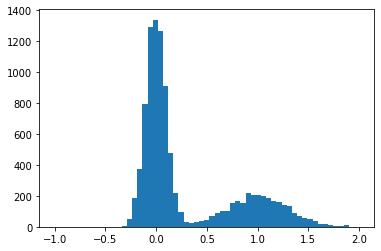

In [435]:
bins = np.linspace(-1,2,60)
plt.hist(dataSet, bins=bins))
plt.show()

# Define a function to implement the "ball" method as a KDE 

In [7]:
def kdeSquare(x,inputData, L=0.2,debug=False):
    
    if type(x) == np.ndarray:
        vals = []
        for _x in x:
            vals.append(kdeSquare(_x,inputData,L))
        return vals
    
    #print(type(x)) 
    
    _dataSet = inputData
    shiftedData = _dataSet - x
    inBall = np.where(abs(shiftedData) < L)
    nInBall = len(inBall[0])
    if debug:
        print(f"nInBall = {nInBall}")   
        print(f"inBall = {inBall}")           
        print(f"_dataSet = {_dataSet}")        
        print(f"shiftedData = {shiftedData}")        

    # Return the density = # in ball / ball width (=2L bc of the abs)
    return nInBall/(2*L)


When we run the kdeSquare with width binSize/2 we should recover the histogram

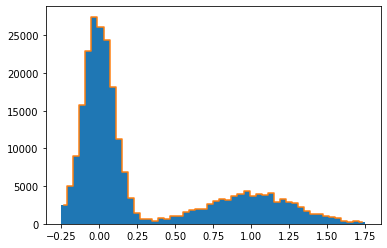

In [60]:
xMin = -0.25
xMax = 1.75
nBins = 50
bins = np.linspace(xMin,xMax,nBins+1) 
binSize = (xMax-xMin)/nBins
binCenters = bins+binSize/2
binCenters = binCenters[0:len(bins)-1]

# plot the histogram densities (ie: divide by binSize )
histData = plt.hist(dataSet, bins=bins, weights=np.full(len(dataSet), 1./binSize))

plt.step(binCenters,kdeSquare(binCenters,dataSet,L=binSize/2),where='mid')
plt.show()

Looks good.

# Lets look at under fitting (L too large)

with L = 3
------------------------------


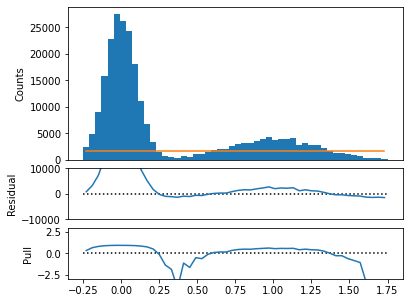

with L = 1
------------------------------


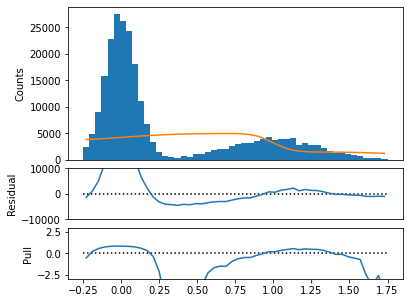

with L = 0.3
------------------------------


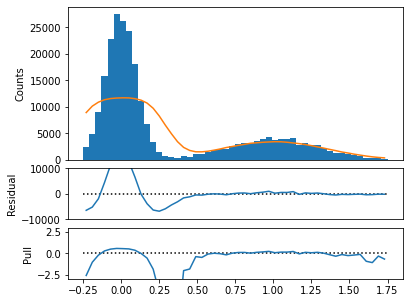

with L = 0.02
------------------------------


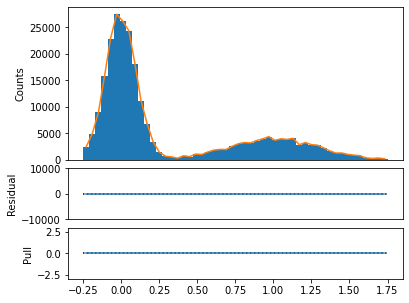

In [61]:
xMin = -0.25
xMax = 1.75
nBins = 50
bins = np.linspace(xMin,xMax,nBins+1) 
binSize = (xMax-xMin)/nBins
binCenters = bins+binSize/2
binCenters = binCenters[0:len(bins)-1]

for _L in [3,1,0.3,binSize/2]:

    print(f"with L = {_L}")
    print(f"{'-'*30}")
    est_kdeSquare = kdeSquare(binCenters,dataSet,L=_L)
    
    #fig,ax = plt.subplots(1)
    fig, axs = plt.subplots(3,1,figsize=(6,5), gridspec_kw={'height_ratios': [3, 1,1]})
    plt.subplots_adjust(hspace=0.1)

    histData = axs[0].hist(dataSet, bins=bins, weights=np.full(len(dataSet), 1./binSize))
    axs[0].plot(binCenters, est_kdeSquare)
    axs[0].set_xticklabels([])
    axs[0].set_xticks([])

    axs[0].set_ylabel('Counts')

    
    res_kdeSquare = (histData[0] - est_kdeSquare)#/(histData[0]+0.0001)
    axs[1].plot([xMin,xMax],[1,1],"k:")
                
    axs[1].plot(binCenters, res_kdeSquare)
    axs[1].set_ylabel('Residual')
    axs[1].set_ylim([-10000, 10000])    
    axs[1].set_xticklabels([])
    axs[1].set_xticks([])


    pull_kdeSquare = (histData[0] - est_kdeSquare)/(histData[0]+1)
    axs[2].plot([xMin,xMax],[0,0],"k:")
                
    axs[2].plot(binCenters, pull_kdeSquare)
    axs[2].set_ylabel('Pull')
    axs[2].set_ylim([-3, 3])    
    plt.show()

# Now over fitting (L too small)

with L = 0.02
------------------------------


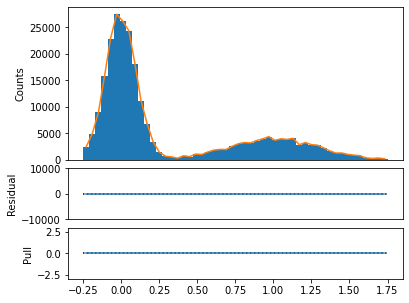

with L = 0.006
------------------------------


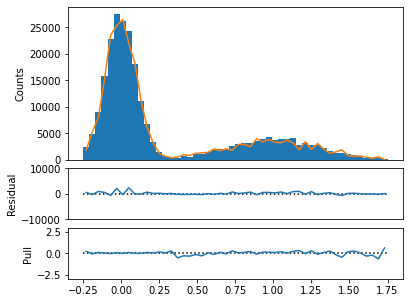

with L = 0.0018
------------------------------


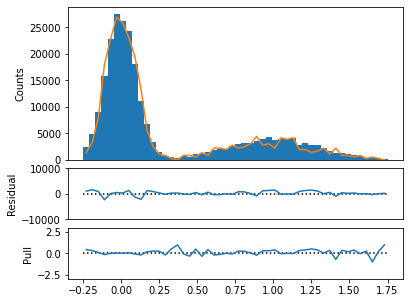

with L = 0.0005399999999999999
------------------------------


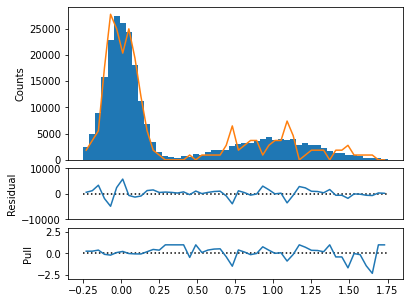

In [10]:
xMin = -0.25
xMax = 1.75
nBins = 50
bins = np.linspace(xMin,xMax,nBins+1) 
binSize = (xMax-xMin)/nBins
binCenters = bins+binSize/2
binCenters = binCenters[0:len(bins)-1]

for _L in [binSize/2,  0.3*binSize/2,   0.3**2*binSize/2,  0.3**3*binSize/2]:

    print(f"with L = {_L}")
    print(f"{'-'*30}")
    est_kdeSquare = kdeSquare(binCenters,dataSet,L=_L)
    
    #fig,ax = plt.subplots(1)
    fig, axs = plt.subplots(3,1,figsize=(6,5), gridspec_kw={'height_ratios': [3, 1,1]})
    plt.subplots_adjust(hspace=0.1)

    histData = axs[0].hist(dataSet, bins=bins, weights=np.full(len(dataSet), 1./binSize))
    axs[0].plot(binCenters, est_kdeSquare)
    axs[0].set_xticklabels([])
    axs[0].set_xticks([])

    axs[0].set_ylabel('Counts')

    
    res_kdeSquare = (histData[0] - est_kdeSquare)#/(histData[0]+0.0001)
    axs[1].plot([xMin,xMax],[1,1],"k:")
                
    axs[1].plot(binCenters, res_kdeSquare)
    axs[1].set_ylabel('Residual')
    axs[1].set_ylim([-10000, 10000])    
    axs[1].set_xticklabels([])
    axs[1].set_xticks([])


    pull_kdeSquare = (histData[0] - est_kdeSquare)/(histData[0]+1)
    axs[2].plot([xMin,xMax],[0,0],"k:")
                
    axs[2].plot(binCenters, pull_kdeSquare)
    axs[2].set_ylabel('Pull')
    axs[2].set_ylim([-3, 3])    
    plt.show()

# Now with a Gaussian Kernal

In [11]:
def kdeGauss(x,inputData, sigma=0.2,SF=1.0,debug=False):
    
    if type(x) == np.ndarray:
        vals = []
        for _x in x:
            vals.append(kdeGauss(_x,inputData,sigma=sigma,SF=SF,debug=debug))
        return vals
    
    _dataSet = inputData
    weights = np.exp(-0.5*( (_dataSet - x)/sigma)**2 )
    norm = 1.0/(sigma*np.sqrt(2*np.pi))
    sumW = np.sum(weights)
    returnVal = SF*norm*sumW
    if debug:
        print(f"_dataSet = {_dataSet}")
        print(f"weights = {weights}")
        print(sumW)
        print(f"sumW = {sumW}")
        print(f"norm = {norm}")
        print(f"returnVal = {returnVal}")        

    return returnVal

In [12]:
dataSetTest = getData(n=10)

Try a bunch of different sigmas

In [13]:
xMin = -0.25
xMax = 1.75
nBins = 50
bins = np.linspace(xMin,xMax,nBins+1) 
binSize = (xMax-xMin)/nBins
binCenters = bins+binSize/2
binCenters = binCenters[0:len(bins)-1]

for _sig in [0.1,0.01,0.001,0.0001]:

    print(f"with sigma = {_sig}")
    print(f"{'-'*30}")
    est_kdeGauss  = kdeGauss(binCenters,dataSet,sigma=_sig,SF=1.0)


    #fig,ax = plt.subplots(1)
    fig, axs = plt.subplots(3,1,figsize=(6,5), gridspec_kw={'height_ratios': [3, 1,1]})
    plt.subplots_adjust(hspace=0.1)

    histData = axs[0].hist(dataSet, bins=bins, weights=np.full(len(dataSet), 1./binSize))
    axs[0].plot(binCenters, est_kdeGauss)
    axs[0].set_xticklabels([])
    axs[0].set_xticks([])

    axs[0].set_ylabel('Counts')

    
    res_kdeGauss = (histData[0] - est_kdeGauss)#/(histData[0]+0.0001)
    axs[1].plot([xMin,xMax],[1,1],"k:")
                
    axs[1].plot(binCenters, res_kdeGauss)
    axs[1].set_ylabel('Residual')
    axs[1].set_ylim([-10000, 10000])    
    axs[1].set_xticklabels([])
    axs[1].set_xticks([])


    pull_kdeGauss = (histData[0] - est_kdeGauss)/(histData[0]+1)
    axs[2].plot([xMin,xMax],[0,0],"k:")
                
    axs[2].plot(binCenters, pull_kdeGauss)
    axs[2].set_ylabel('Pull')
    axs[2].set_ylim([-3, 3])    
    plt.show()

with sigma = 0.1
------------------------------


with sigma = 0.01
------------------------------


with sigma = 0.001
------------------------------


with sigma = 0.0001
------------------------------


# Trying 2D 

In [51]:
def getData2DUncorr(n, mu1=0, sig1=0.1, mu2=1, sig2=0.3, frac1=0.5):

    data1 = np.random.normal(mu1, sig1, int(2*n*frac1))
    data2 = np.random.normal(mu2, sig2, int(2*n*(1-frac1)))
    dataC = np.concatenate((data1,data2))
    np.random.shuffle(dataC)
    dataC = dataC.reshape(n, 2)

    return dataC

In [52]:
data = getData2DUncorr(100000)

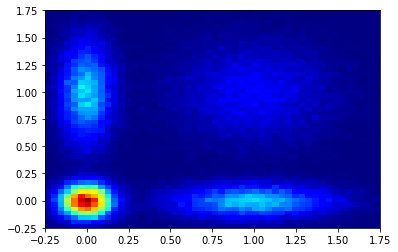

In [164]:
nData = len(data)
xMin = -0.25
xMax = 1.75
nBins = 50
bins = np.linspace(xMin,xMax,nBins+1) 
binSize = (xMax-xMin)/nBins
binArea = binSize*binSize


plt.hist2d(data[:,0], data[:,1], bins=(bins, bins), cmap=plt.cm.jet, weights=np.full(nData, 1./(binArea)))
plt.show()

# Define a function to implement the "ball" method as a KDE 

In [383]:
def kdeBall2D(x, inputData, R=0.2,debug=False):
    
    if not type(x) == np.ndarray:
        print("x has to be np.ndarray")
        
    if not x.shape == (2,):
        vals = []
        for _x in x:
            vals.append(kdeBall2D(_x,inputData,R))
        return vals
   
    _dataSetX = inputData[:,0]
    _dataSetY = inputData[:,1]    

    shiftedDataX = _dataSetX - x[0]
    shiftedDataY = _dataSetY - x[1]
    shiftedDataR2 = shiftedDataX*shiftedDataX + shiftedDataY*shiftedDataY
    
    inBall = np.where(shiftedDataR2 < R*R)
    nInBall = len(inBall[0])
    if debug:
        print(f"nInBall = {nInBall}")   
        print(f"inBall = {inBall}")           
        print(f"_dataSetX = {_dataSetX}")        
        print(f"_dataSetY = {_dataSetY}")                
        print(f"shiftedDataX = {shiftedDataX}")        
        print(f"shiftedDataY = {shiftedDataY}")                

    # Return the density = # in ball / ball width (=2L bc of the abs)
    return nInBall/(np.pi*R*R)


# Now the square method

In [418]:
def kdeSquare2D(x, inputData, L=0.2,debug=False):
    
    if not type(x) == np.ndarray:
        print("x has to be np.ndarray")
        
    if not x.shape == (2,):
        vals = []
        for _x in x:
            vals.append(kdeSquare2D(_x,inputData,L))
        return vals
   
    _dataSetX = inputData[:,0]
    _dataSetY = inputData[:,1]    

    shiftedDataX = _dataSetX - x[0]
    shiftedDataY = _dataSetY - x[1]


    inSquare = np.where(np.logical_and((abs(shiftedDataX) <= L), (abs(shiftedDataY) <= L)))
    nInSquare = len(inSquare[0])
    if debug:
        inSquareX = np.where(abs(shiftedDataX) < L)
        inSquareY = np.where(abs(shiftedDataY) < L)    
        #print(f"inSquareX {inSquareX}")
        #print(f"inSquareY {inSquareY}")
        print(f"inSquare {inSquare}") 
        print(f"_dataSetX = {_dataSetX[inSquare]}")        
        print(f"_dataSetY = {_dataSetY[inSquare]}")                
        print(f"shiftedDataX = {shiftedDataX}")        
        print(f"shiftedDataY = {shiftedDataY}")                

    # Return the density = # in ball / ball width (=2L bc of the abs)
    return nInSquare/(2*L*2*L)

# Now the Gauss Method

In [419]:
def kdeGauss2D(x, inputData, sigma=0.2,debug=False):
    
    if not type(x) == np.ndarray:
        print("x has to be np.ndarray")
        
    if not x.shape == (2,):
        vals = []
        for _x in x:
            vals.append(kdeGauss2D(_x,inputData,sigma))
        return vals
   
    _dataSetX = inputData[:,0]
    _dataSetY = inputData[:,1] 
    
    weights = np.exp(-0.5*( (_dataSetX - x[0])/sigma)**2 +  -0.5*( (_dataSetY - x[1])/sigma)**2)
    norm = 1.0/(2*np.pi*sigma*sigma)
    sumW = np.sum(weights)
    returnVal = norm*sumW

    # Return the density = # in ball / ball width (=2L bc of the abs)
    return returnVal

# Lets try it out

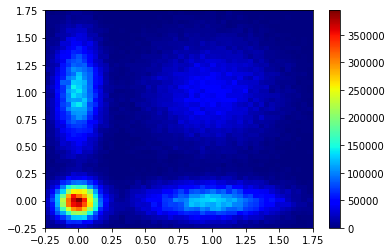

<ipython-input-426-e8f55b45ba51>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  kdeBall = ax.pcolormesh(binCenters, binCenters, ZBall, cmap=plt.cm.jet)


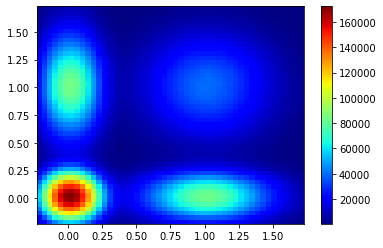

<ipython-input-426-e8f55b45ba51>:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  kdeSquare = ax.pcolormesh(binCenters, binCenters, ZSquare, cmap=plt.cm.jet)


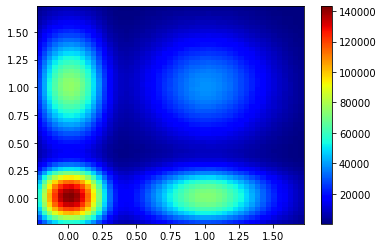

<ipython-input-426-e8f55b45ba51>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  kdeGauss = ax.pcolormesh(binCenters, binCenters, ZGauss, cmap=plt.cm.jet)


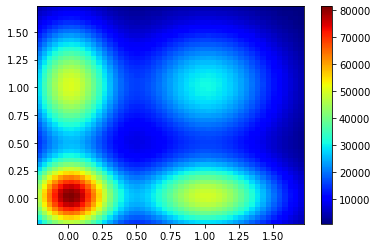

In [426]:
nData = len(data)
xMin = -0.25
xMax = 1.75
nBins = 50
bins = np.linspace(xMin,xMax,nBins+1) 
binSize = (xMax-xMin)/nBins
binArea = binSize*binSize

binCenters = bins+binSize/2
binCenters = binCenters[0:len(bins)-1]

fig, ax = plt.subplots()
histOut, _, _, h3 = plt.hist2d(data[:,0], data[:,1], bins=(bins, bins), cmap=plt.cm.jet, weights=np.full(nData, 1./(binArea)))
fig.colorbar(h3)
plt.show()


ZBall = np.zeros((50, 50))
ZSquare = np.zeros((50, 50))
ZGauss = np.zeros((50, 50))


xv, yv = np.meshgrid(binCenters, binCenters)

for ix in range(xv.shape[0]):
    for iy in range(xv.shape[1]):
        #print(ix, iy)
        #print(xv[ix,iy], yv[ix,iy])
        ZBall[ix,iy] = kdeBall2D(np.array([xv[ix,iy], yv[ix,iy]]), data)
        ZSquare[ix,iy] = kdeSquare2D(np.array([xv[ix,iy], yv[ix,iy]]), data)
        ZGauss[ix,iy] = kdeGauss2D(np.array([xv[ix,iy], yv[ix,iy]]), data)


fig, ax = plt.subplots()
kdeBall = ax.pcolormesh(binCenters, binCenters, ZBall, cmap=plt.cm.jet)
fig.colorbar(kdeBall)
plt.show()

fig, ax = plt.subplots()
kdeSquare = ax.pcolormesh(binCenters, binCenters, ZSquare, cmap=plt.cm.jet)
fig.colorbar(kdeSquare)
plt.show()

fig, ax = plt.subplots()
kdeGauss = ax.pcolormesh(binCenters, binCenters, ZGauss, cmap=plt.cm.jet)
fig.colorbar(kdeGauss)
plt.show()

# Now lets do a bunch

Start with the Square (this should close when the bin size matches the histogram)

In [431]:
len(data)


100000

binSize = 0.04


<ipython-input-432-4cdf8541bc80>:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  kde = ax[1].pcolormesh(binCenters, binCenters, ZSquare, cmap=plt.cm.jet)
<ipython-input-432-4cdf8541bc80>:51: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  res = ax[2].pcolormesh(binCenters, binCenters, residual, cmap=plt.cm.jet)
<ipython-input-432-4cdf8541bc80>:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.

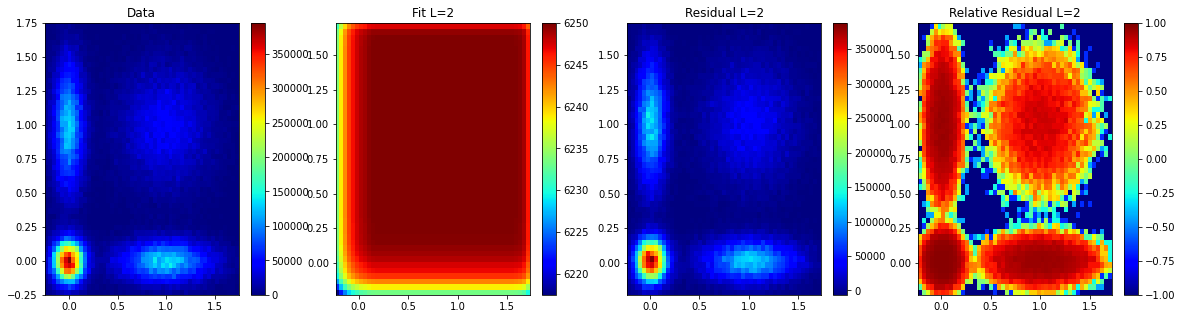

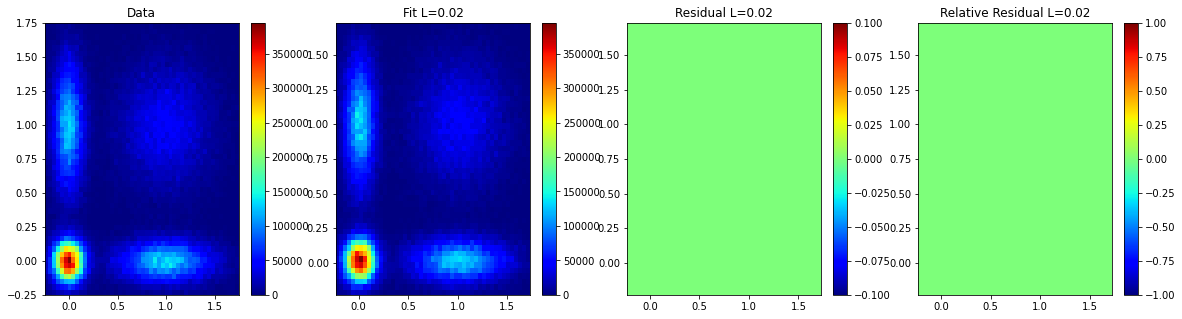

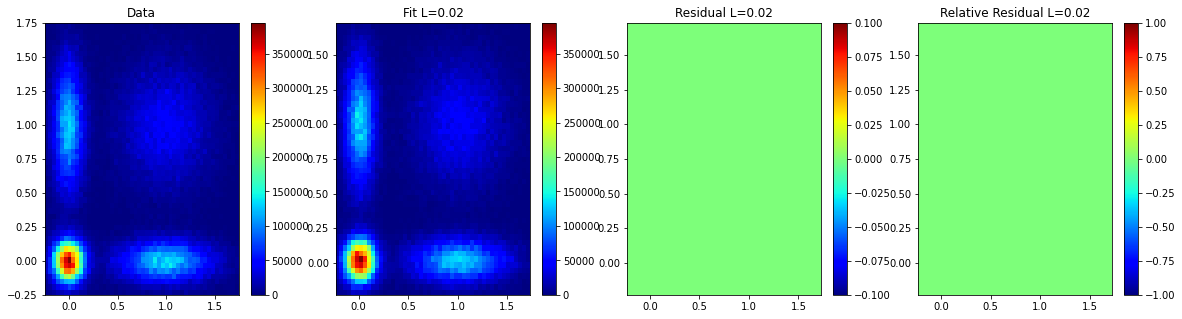

In [432]:
nData = len(data)
xMin = -0.25
xMax = 1.75
nBins = 50
bins = np.linspace(xMin,xMax,nBins+1) 
binSize = (xMax-xMin)/nBins
binArea = binSize*binSize

binCenters = bins+binSize/2
binCenters = binCenters[0:len(bins)-1]
xv, yv = np.meshgrid(binCenters, binCenters)

print(f"binSize = {binSize}")

#for L in [binSize/2]:
for L in [2,0.2,0.02,0.002,binSize/2]:
#for R in [0.2]:    

    nFigs = 4
    
    fig, ax = plt.subplots(1,nFigs,figsize=(nFigs*5,5))

    #
    # The DAta
    #
    histOut, h_xEdges, h_yEdges, h3 = ax[0].hist2d(data[:,1], data[:,0], bins=(bins, bins), cmap=plt.cm.jet, weights=np.full(nData, 1./(binArea)))
    fig.colorbar(h3, ax=ax[0])
    ax[0].set_title('Data')


    #
    # The KDE
    #
    ZSquare = np.zeros((50, 50))

    for ix in range(xv.shape[0]):
        for iy in range(xv.shape[1]):
            #print(ix, iy)
            #print(xv[ix,iy], yv[ix,iy])
            ZSquare[ix,iy] = kdeSquare2D(np.array([xv[ix,iy], yv[ix,iy]]), data,L=L)

    kde = ax[1].pcolormesh(binCenters, binCenters, ZSquare, cmap=plt.cm.jet)
    ax[1].set_title('Fit L='+str(L))
    fig.colorbar(kde, ax=ax[1])

    #
    # The Residual
    #
    residual = histOut-ZSquare

    res = ax[2].pcolormesh(binCenters, binCenters, residual, cmap=plt.cm.jet)
    fig.colorbar(res, ax=ax[2])
    ax[2].set_title('Residual L='+str(L))
    
    #
    # Relative Residual
    #
    relRes = residual/(histOut+1)
    
    vRange = 1e0
    res = ax[3].pcolormesh(binCenters, binCenters, relRes, cmap=plt.cm.jet, vmin=-1*vRange, vmax=vRange)
    fig.colorbar(res, ax=ax[3])
    ax[3].set_title('Relative Residual L='+str(L))    

    plt.show()

Now the Ball

(50, 50)


<ipython-input-433-59364f8f0ebd>:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  kde = ax[1].pcolormesh(binCenters, binCenters, Z, cmap=plt.cm.jet)
<ipython-input-433-59364f8f0ebd>:51: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  res = ax[2].pcolormesh(binCenters, binCenters, residual, cmap=plt.cm.jet)
<ipython-input-433-59364f8f0ebd>:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Eith

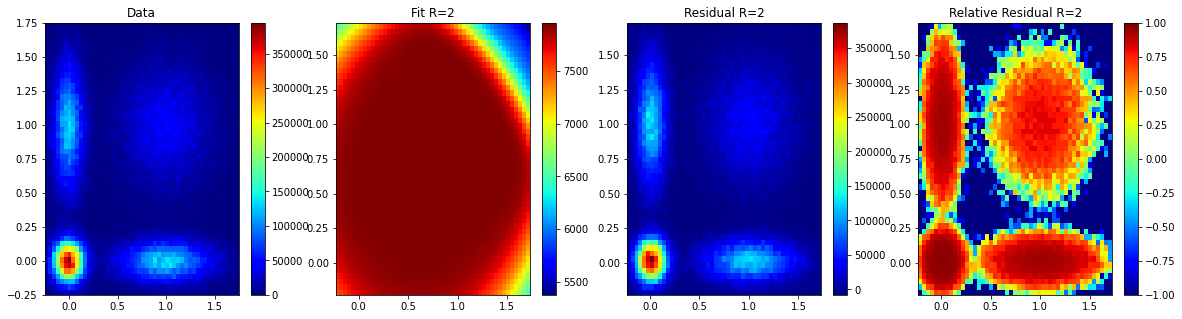

(50, 50)


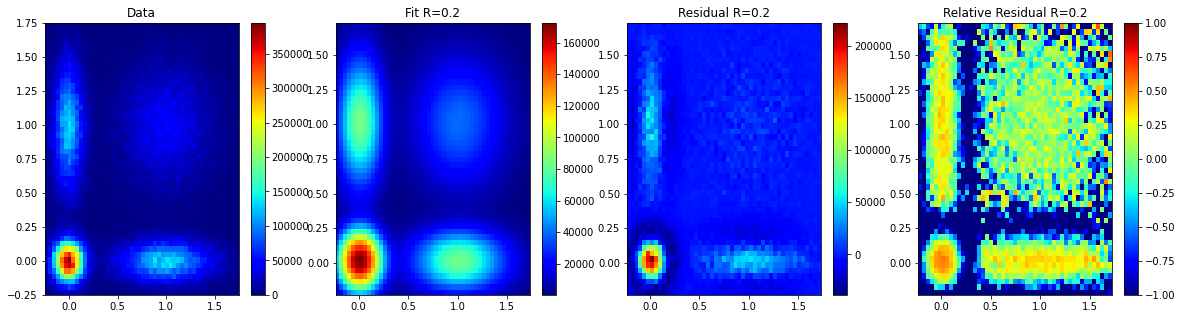

(50, 50)


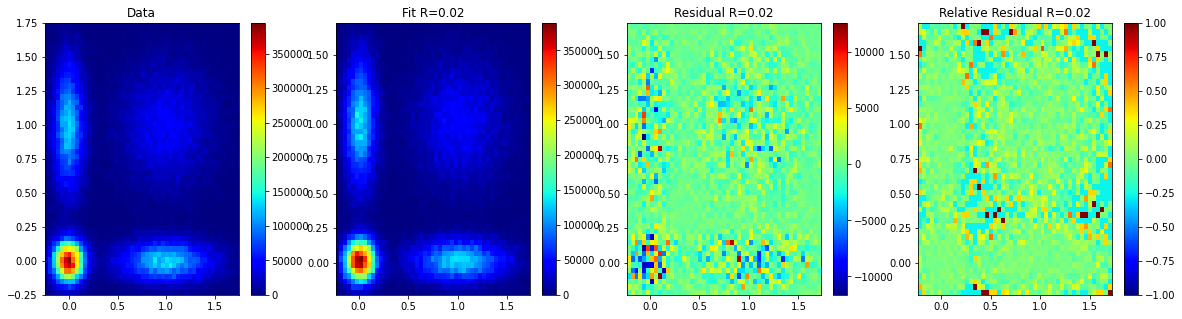

(50, 50)


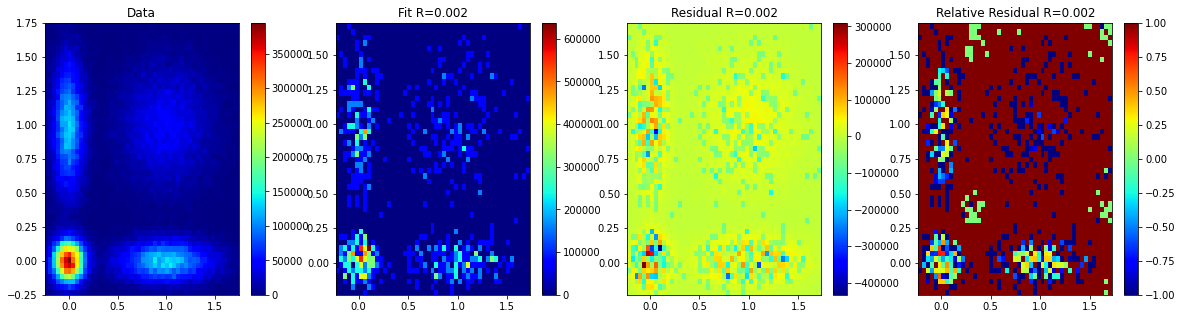

In [433]:
nData = len(data)
xMin = -0.25
xMax = 1.75
nBins = 50
bins = np.linspace(xMin,xMax,nBins+1) 
binSize = (xMax-xMin)/nBins
binArea = binSize*binSize

binCenters = bins+binSize/2
binCenters = binCenters[0:len(bins)-1]



for R in [2,0.2,0.02,0.002]:
#for R in [0.2]:    

    nFigs = 4
    
    fig, ax = plt.subplots(1,nFigs,figsize=(nFigs*5,5))

    #
    # The DAta
    #
    histOut, _, _, h3 = ax[0].hist2d(data[:,1], data[:,0], bins=(bins, bins), cmap=plt.cm.jet, weights=np.full(nData, 1./(binArea)))
    fig.colorbar(h3, ax=ax[0])
    ax[0].set_title('Data')

    #
    # The KDE
    #
    Z = np.zeros((50, 50))
    print(Z.shape)

    xv, yv = np.meshgrid(binCenters, binCenters)

    for ix in range(xv.shape[0]):
        for iy in range(xv.shape[1]):
            #print(ix, iy)
            #print(xv[ix,iy], yv[ix,iy])
            Z[ix,iy] = kdeBall2D(np.array([xv[ix,iy], yv[ix,iy]]), data,R=R)

    kde = ax[1].pcolormesh(binCenters, binCenters, Z, cmap=plt.cm.jet)
    ax[1].set_title('Fit R='+str(R))
    fig.colorbar(kde, ax=ax[1])

    #
    # The Residual
    #
    residual = histOut-Z

    res = ax[2].pcolormesh(binCenters, binCenters, residual, cmap=plt.cm.jet)
    fig.colorbar(res, ax=ax[2])
    ax[2].set_title('Residual R='+str(R))
    
    #
    # Relative Residual
    #
    relRes = residual/(histOut+1)
    
    vRange = 1e0
    res = ax[3].pcolormesh(binCenters, binCenters, relRes, cmap=plt.cm.jet, vmin=-1*vRange, vmax=vRange)
    fig.colorbar(res, ax=ax[3])
    ax[3].set_title('Relative Residual R='+str(R))    

    plt.show()

Now the Gauss

binSize = 0.04


<ipython-input-434-176901140a90>:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  kde = ax[1].pcolormesh(binCenters, binCenters, ZGauss, cmap=plt.cm.jet)
<ipython-input-434-176901140a90>:51: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  res = ax[2].pcolormesh(binCenters, binCenters, residual, cmap=plt.cm.jet)
<ipython-input-434-176901140a90>:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3. 

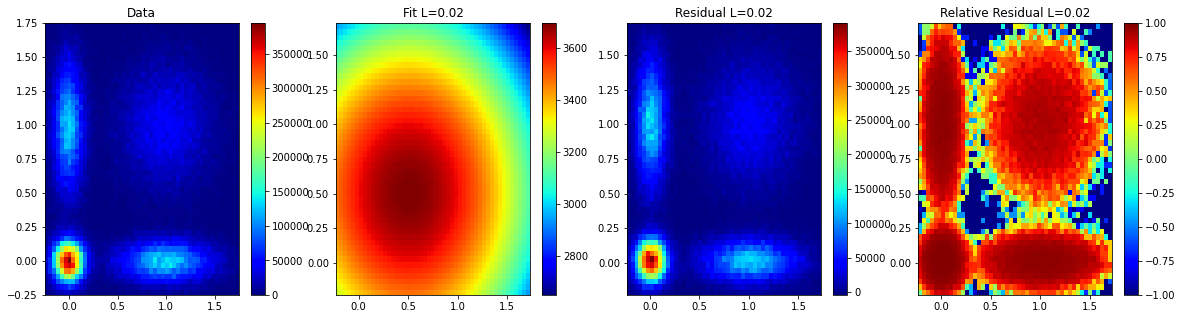

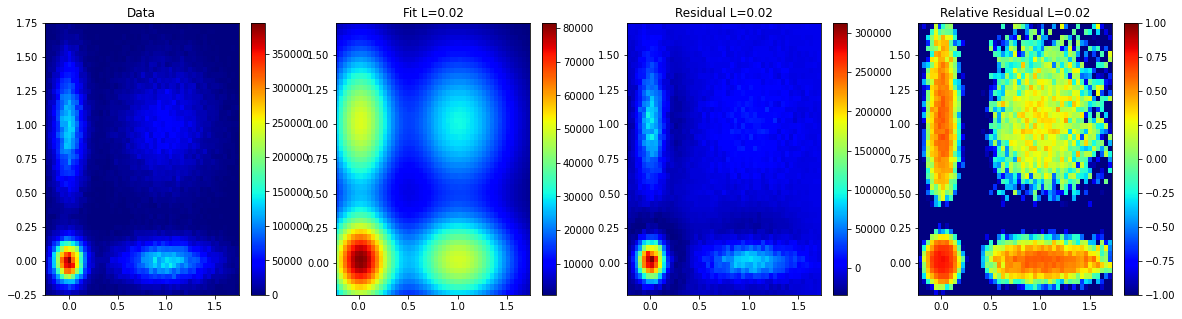

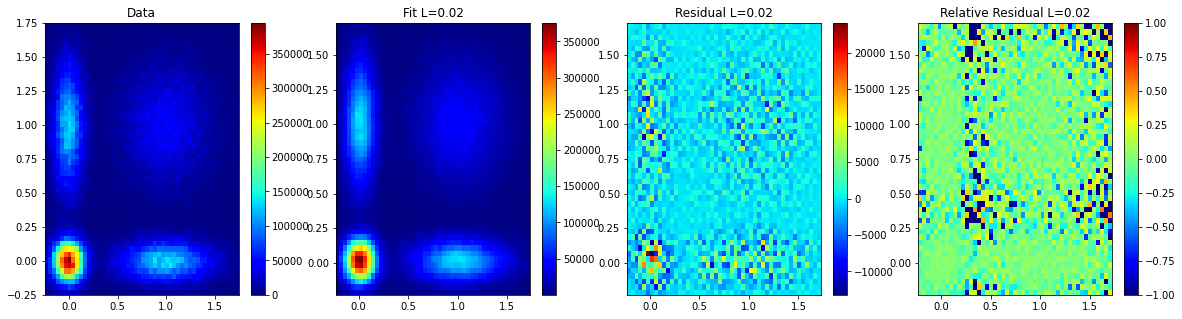

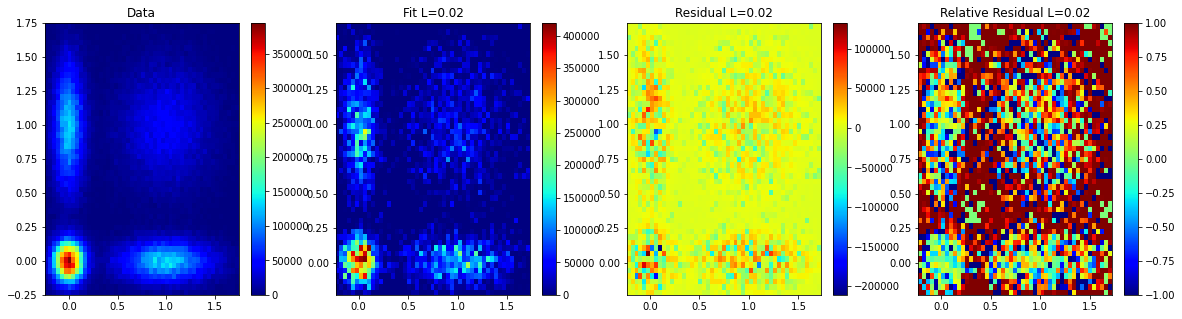

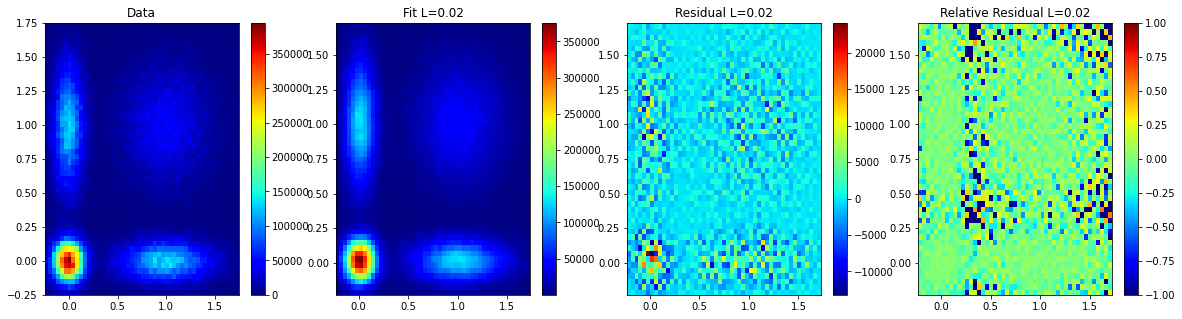

In [434]:
nData = len(data)
xMin = -0.25
xMax = 1.75
nBins = 50
bins = np.linspace(xMin,xMax,nBins+1) 
binSize = (xMax-xMin)/nBins
binArea = binSize*binSize

binCenters = bins+binSize/2
binCenters = binCenters[0:len(bins)-1]
xv, yv = np.meshgrid(binCenters, binCenters)

print(f"binSize = {binSize}")

#for L in [binSize/2]:
for sigma in [2,0.2,0.02,0.002,binSize/2]:
#for R in [0.2]:    

    nFigs = 4
    
    fig, ax = plt.subplots(1,nFigs,figsize=(nFigs*5,5))

    #
    # The DAta
    #
    histOut, h_xEdges, h_yEdges, h3 = ax[0].hist2d(data[:,1], data[:,0], bins=(bins, bins), cmap=plt.cm.jet, weights=np.full(nData, 1./(binArea)))
    fig.colorbar(h3, ax=ax[0])
    ax[0].set_title('Data')


    #
    # The KDE
    #
    ZGauss = np.zeros((50, 50))

    for ix in range(xv.shape[0]):
        for iy in range(xv.shape[1]):
            #print(ix, iy)
            #print(xv[ix,iy], yv[ix,iy])
            ZGauss[ix,iy] = kdeGauss2D(np.array([xv[ix,iy], yv[ix,iy]]), data,sigma=sigma)

    kde = ax[1].pcolormesh(binCenters, binCenters, ZGauss, cmap=plt.cm.jet)
    ax[1].set_title('Fit L='+str(L))
    fig.colorbar(kde, ax=ax[1])

    #
    # The Residual
    #
    residual = histOut-ZGauss

    res = ax[2].pcolormesh(binCenters, binCenters, residual, cmap=plt.cm.jet)
    fig.colorbar(res, ax=ax[2])
    ax[2].set_title('Residual L='+str(L))
    
    #
    # Relative Residual
    #
    relRes = residual/(histOut+1)
    
    vRange = 1e0
    res = ax[3].pcolormesh(binCenters, binCenters, relRes, cmap=plt.cm.jet, vmin=-1*vRange, vmax=vRange)
    fig.colorbar(res, ax=ax[3])
    ax[3].set_title('Relative Residual L='+str(L))    

    plt.show()